<a href="https://colab.research.google.com/github/RJRS/titanic-analysis/blob/main/%E5%B0%88%E9%A1%8C%E5%B0%88%E4%BD%9C_week1_d2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **專題實作 #01： 鐵達尼號存活預測**

# **預先準備**

In [1]:
import numpy as np
import pandas as pd

### **1. 在你的 Colab 程式碼中載入 `train.csv` 資料集**

In [2]:
# 1. 在你的 Colab 程式碼中載入 `train.csv` 資料集
url_train = 'https://raw.githubusercontent.com/RJRS/titanic-analysis/ea80ca3e98b1640de508501f399a2e6048a24b33/train.csv'
url_test = 'https://raw.githubusercontent.com/RJRS/titanic-analysis/8d0cd0d6e164878dff76cab2fdbd9e07aa7343e8/test.csv'
df_train = pd.read_csv(url_train)
df_test = pd.read_csv(url_test)

In [3]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
# 只列出前面 5 列 (0-4)
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### **2. 請瞭解該資料中所有欄位的定義為何？**

In [5]:
# 列出欄位名稱
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

**從kaggle找到各個欄位的定義：**
* survival：  Survival	0 = No, 1 = Yes
* pclass：  Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
* sex：  Sex	
* Age：  Age in years	
* sibsp：  # of siblings / spouses aboard the Titanic	
* parch：  # of parents / children aboard the Titanic	
* ticket：  Ticket number	
* fare：  Passenger fare	
* cabin：  Cabin number	
* embarked：  Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

In [6]:
# 使用describe()來列出各個欄位的狀況
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# 使用info()來列出各個欄位的型態
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### **3. 進一步觀察其他「數值欄位/類別欄位」的屬性與「是否生存欄位」之關係程度，找出關係大的欄位。**

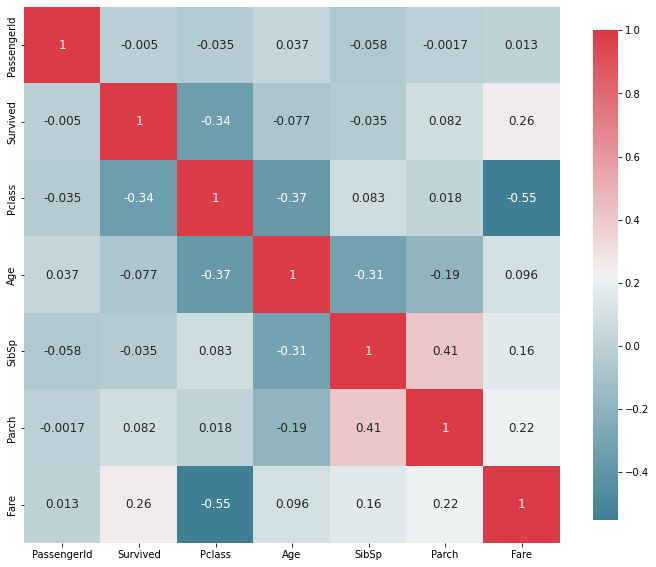

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = df_train.corr()
cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax = plt.subplots( figsize =( 12 , 10 ) )[1],
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
)

In [9]:
# 數值欄位： PassengerId, Pclass, Age, SibSp, Parch, Fare
# 類別欄位： Name, Sex, Ticket, Cabin, Embarked
# 是否生存： Survival 

In [10]:
# Excersise: 進一步觀察其他「數值欄位」的屬性與「是否生存」之關係程度：
# PassengerId, Age, SibSp, Parch 較無關係
# Pclass, Fare 相對較有關係，表示票價跟艙等跟存活關聯較有關連

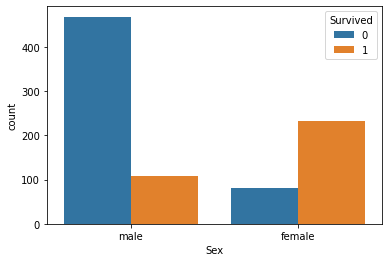

In [11]:
# Excersise: 進一步觀察其他「類別欄位」的屬性與「是否生存」之關係程度：
# 類別欄位： Sex, Embarked
# sns.countplot(x='Name',hue='Survived',data=df_train)
sns.countplot(x='Sex',hue='Survived',data=df_train)
# 女性較易存活

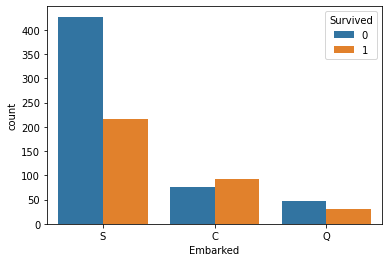

In [12]:
sns.countplot(x='Embarked',hue='Survived',data=df_train)
# Southampton上岸的較易存活

### **4. 請進行「必要」的資料前處理操作，讓資料變成可以跑得動模型的格式即可。**

In [13]:
# 資料清理
sex_encoding = {
    'male': 0,
    'female': 1
}
df_train['Sex'] = df_train['Sex'].map(lambda d: sex_encoding[d])

In [14]:
# 資料空值處理
df_train.info()
df_train.isnull().any()
# 觀察到其中 Age, Cabin, Embarked 這三欄有空值，其中 Cabin缺了很多，Embarked缺二個，Age缺了177個

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [15]:
# 刪除Cabin, Age填入mean，Embarked刪除缺的列，
df_train = df_train.drop(['Cabin'], axis=1)
df_train.Age = df_train.Age.fillna(df_train.Age.mean())
df_train = df_train.dropna()
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,111369,30.0000,C


In [16]:
df_train.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Embarked       False
dtype: bool

### **5. 最後請將資料接著執行下方範例，看看能否產出結果呢。**

In [17]:
df_train = df_train.drop(['Name', 'Ticket', 'Embarked'], axis=1)

In [18]:
columns_X = set(df_train.columns) - {'Survived'}
columns_y = ['Survived']

train_X = df_train[columns_X]
train_y = df_train[columns_y]

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

log = LogisticRegression(random_state=0, max_iter=3000)
scores = cross_val_score(log, train_X, train_y.values.ravel(),cv=5,scoring='accuracy')
scores

array([0.79213483, 0.7752809 , 0.78089888, 0.76404494, 0.80225989])

# **運用資料與特徵優化分析**

### **1. 延續昨天的觀察，欄位中與「是否生存欄位」找出關係比較大的欄位有哪些？你是如何定義「關係大」的呢？**

In [19]:
df_train_corr = df_train.loc[:, ['Sex', 'Survived']]
df_train_corr.corr()

,Sex,Survived
Sex,1.000000,0.541585
Survived,0.541585,1.000000


與是否生存的欄位較相關的可以參考上面的熱力圖，比較不同參數的相關係數，排除無序的PassangerID, Ticket, Name, Cabin
*   Sex: 0.542
*   PClass: -0.34
*   Age: -0.077
*   SibSp: -0.035
*   Parch:  0.082
*   Fare: 0.26
相關系數比較高的有性別、艙等跟、票價

### **2. 請問資料中有哪些「欄位」你覺得是多餘的，在分析過程中應該被排除的呢？為什麼？**

In [20]:
# 1. 在你的 Colab 程式碼中載入 `train.csv` 資料集
url_train = 'https://raw.githubusercontent.com/RJRS/titanic-analysis/ea80ca3e98b1640de508501f399a2e6048a24b33/train.csv'
url_test = 'https://raw.githubusercontent.com/RJRS/titanic-analysis/8d0cd0d6e164878dff76cab2fdbd9e07aa7343e8/test.csv'
df_train = pd.read_csv(url_train)
df_test = pd.read_csv(url_test)

可排除的項目有
1. 字串或無序參考，像是 PassengerId, Ticket, Name，但也可以經特徵工程作分析
2. 記錄不詳的參考，像是 Cabin，有大量的記錄缺漏

In [21]:
df_train_2 = df_train.drop(['Cabin', 'PassengerId', 'Ticket', 'Name'], axis=1)

### **3. 請你針對「有缺失值」的幾個欄位，嘗試比較不同的處理策略（例如用常數、中位數、平均數填補）。**

In [22]:
# 填入常數，可是隨便插入的常數可能會破壞整個分析內容，需要注意
df_train_2.Age = df_train_2.Age.fillna(0)

In [23]:
# 填入常數
df_train_2.Age = df_train_2.Age.fillna(df_train_2.Age.mean())

In [24]:
# 填入平均數
df_train_2.Age = df_train_2.Age.fillna(df_train_2.Age.mean())

In [25]:
df_train = df_train.dropna()

### **4. 請你針對「非數值型」的幾個欄位，嘗試比較不同的處理策略（例如用 LabelEncoder 或 OneHotEncoder）。**

In [26]:
# 需要處理的非數值型欄位，有Sex, Cabin, Embarked，其中Cabin因缺失值過多，建議直接刪除
# Sex 使用 0，1 填入，如老師給的代碼
sex_encoding = {
    'male': 0,
    'female': 1
}
df_train_2['Sex'] = df_train_2['Sex'].map(lambda d: sex_encoding[d])

In [27]:
# Sex 使用 LabelEncoder 填入
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df_train_2['Sex'] = labelencoder.fit_transform(df_train_2['Sex'])

In [28]:
# Embarked 使用 OneHot Encoding 修改
OneHot_Embarked = pd.get_dummies( df_train_2.Embarked, prefix='Embarked' )
# 合併 Embarked 編碼後的欄位
df_train_2 = pd.concat( [ df_train_2, OneHot_Embarked ], axis=1 )
df_train_2.drop( 'Embarked', axis=1, inplace=True )

In [29]:
df_train_2

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,0,0,1
1,1,1,1,38.0,1,0,71.2833,1,0,0
2,1,3,1,26.0,0,0,7.9250,0,0,1
3,1,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,0,35.0,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,0,0,1
887,1,1,1,19.0,0,0,30.0000,0,0,1
888,0,3,1,0.0,1,2,23.4500,0,0,1
889,1,1,0,26.0,0,0,30.0000,1,0,0


### **5. 請你嘗試不同的特徵工程手法，產生可以幫助分析結果的新變數。**

In [30]:
# https://aifreeblog.herokuapp.com/posts/64/Data_Analytics_in_Practice_Titanic/
# 參考人家的作法
# 先觀察 Name 欄位，發現可以擷取出稱謂(Title)的資訊，來幫助提升模型預測的準確度。
# 使用 split( ) ，來擷取出 Name 欄位中的稱謂
df_train_3 = pd.read_csv(url_train)
df_train_3['Title'] = df_train_3.Name.str.split(', ', expand=True)[1]
df_train_3['Title'] = df_train_3.Title.str.split('.', expand=True)[0]
df_train_3['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [31]:
# 少數乘客，例如：Rev(Reverend)為牧師的尊稱、Countess為伯爵夫人等，
# 將同樣性別或關係的稱謂合併，避免產生這些稱謂影響模型的預測準確度。
# 這裏我們將利用 replace( ) 函數，將上述擷取出的稱謂總歸為五類：Mr、Mrs、Miss、Master、Rare
df_train_3['Title'] = df_train_3.Title.replace( ['Don','Rev','Dr','Major','Lady','Sir','Col','Capt','Countess','Jonkheer','Dona', 'the Countess'], 'Rare' )
df_train_3['Title'] = df_train_3.Title.replace( ['Ms','Mlle'], 'Miss' )
df_train_3['Title'] = df_train_3.Title.replace( 'Mme', 'Mrs' )
df_train_3['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Rare'], dtype=object)

In [32]:
# 刪除原始資料中的 Name 欄位 
df_train_3.drop( 'Name', axis=1, inplace=True )

In [33]:
# Title 使用 OneHot Encoding 修改
OneHot_title = pd.get_dummies( df_train_3.Title, prefix='Title' )
# 合併 Embarked 編碼後的欄位
df_train_3 = pd.concat( [ df_train_3, OneHot_title ], axis=1 )
df_train_3.drop( 'Title', axis=1, inplace=True )

In [34]:
df_train_3

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0,1,0
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,0
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,0,0,0,1,0
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,211536,13.0000,NaN,S,0,0,0,0,1
887,888,1,1,female,19.0,0,0,112053,30.0000,B42,S,0,1,0,0,0
888,889,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0,1,0,0,0
889,890,1,1,male,26.0,0,0,111369,30.0000,C148,C,0,0,1,0,0


In [35]:
df_train_3 = df_train_3.drop(['Cabin', 'Ticket'], axis=1)

In [36]:
df_train_3.Age = df_train_3.Age.fillna(df_train_3.Age.mean())

In [37]:
sex_encoding = {
    'male': 0,
    'female': 1
}
df_train_3['Sex'] = df_train_3['Sex'].map(lambda d: sex_encoding[d])
OneHot_Embarked = pd.get_dummies( df_train_3.Embarked, prefix='Embarked' )
# 合併 Embarked 編碼後的欄位
df_train_3 = pd.concat( [ df_train_3, OneHot_Embarked ], axis=1 )
df_train_3.drop( 'Embarked', axis=1, inplace=True )

In [38]:
df_train_3

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,0,22.000000,1,0,7.2500,0,0,1,0,0,0,0,1
1,2,1,1,1,38.000000,1,0,71.2833,0,0,0,1,0,1,0,0
2,3,1,3,1,26.000000,0,0,7.9250,0,1,0,0,0,0,0,1
3,4,1,1,1,35.000000,1,0,53.1000,0,0,0,1,0,0,0,1
4,5,0,3,0,35.000000,0,0,8.0500,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.000000,0,0,13.0000,0,0,0,0,1,0,0,1
887,888,1,1,1,19.000000,0,0,30.0000,0,1,0,0,0,0,0,1
888,889,0,3,1,29.699118,1,2,23.4500,0,1,0,0,0,0,0,1
889,890,1,1,0,26.000000,0,0,30.0000,0,0,1,0,0,1,0,0


In [39]:
columns_X = set(df_train_3.columns) - {'Survived'}
columns_y = ['Survived']

train_X = df_train_3[columns_X]
train_y = df_train_3[columns_y]

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

log = LogisticRegression(random_state=0, max_iter=3000)
scores = cross_val_score(log, train_X, train_y.values.ravel(),cv=5,scoring='accuracy')
scores

array([0.83240223, 0.82022472, 0.80337079, 0.79775281, 0.87078652])

# **模型優化與比較**

In [40]:
df_train_3.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs',
       'Title_Rare', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [43]:
columns_X = [
       'Pclass', 'Sex', 'Age', 'Fare',
       'SibSp', 'Parch', 
       'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs',
       'Title_Rare', 'Embarked_C', 'Embarked_Q', 'Embarked_S' 
]
columns_y = ['Survived']

train_X = df_train_3[columns_X]
train_y = df_train_3[columns_y]

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

log = LogisticRegression(random_state=0, max_iter=3000)
scores = cross_val_score(log, train_X, train_y.values.ravel(),cv=5,scoring='accuracy')
print(scores)
print(scores.mean())

[0.83798883 0.82022472 0.80337079 0.80337079 0.86516854]
0.8260247316552632


In [44]:
# machine learning
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier

In [45]:
# logistic regression 
log = LogisticRegression(random_state=0)
scores_1 = cross_val_score(log, train_X, train_y.values.ravel(),cv=5,scoring='accuracy').mean()

# Support Vector Machines
svc = SVC()
scores_2 = cross_val_score(svc, train_X, train_y.values.ravel(),cv=5,scoring='accuracy').mean()

# Decision Tree
decision_tree = DecisionTreeClassifier()
scores_3 = cross_val_score(decision_tree, train_X, train_y.values.ravel(),cv=5,scoring='accuracy').mean()

# KNN
knn = KNeighborsClassifier(n_neighbors = 3)
scores_4 = cross_val_score(knn, train_X, train_y.values.ravel(),cv=5,scoring='accuracy').mean()

# Gaussian Naive Baye
gaussian = GaussianNB()
scores_5 = cross_val_score(gaussian, train_X, train_y.values.ravel(),cv=5,scoring='accuracy').mean()

# RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
scores_6 = cross_val_score(rf, train_X, train_y.values.ravel(),cv=5,scoring='accuracy').mean()

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [46]:
models = pd.DataFrame({
    'Model': ['Logistic Regression',
              'Support Vector Machines',
              'Decision Tree',
              'KNN',  
              'Naive Bayes',
              'RandomForestClassifier' ],
    'Score': [scores_1, scores_2, scores_3, scores_4, scores_5, scores_6]})

models

,Model,Score
0,Logistic Regression,0.824907
1,Support Vector Machines,0.674616
2,Decision Tree,0.777798
3,KNN,0.716088
4,Naive Bayes,0.801362
5,RandomForestClassifier,0.801356


In [47]:
from sklearn.model_selection import GridSearchCV

svc = SVC()
Parameters = {
    'C' : [ 1.5, 2, 2.5],
    'gamma' : [0.05,0.1],
    'kernel' : ['rbf']
}

clf= GridSearchCV(svc, Parameters, cv = 5, n_jobs = 6)
clf.fit(train_X, train_y)
print(clf.best_params_)
# Result: C = 2, gamma = 0.1 if using Gaussian Kernel

scores_7 = cross_val_score(svc, train_X, train_y.values.ravel(), cv=5,scoring='accuracy').mean()
print(scores_7)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'C': 2.5, 'gamma': 0.05, 'kernel': 'rbf'}
0.674615529470843


In [49]:
rf = RandomForestClassifier(n_estimators=100)
Parameters = {
  'max_depth' : [6, 8],
  'n_estimators': [50, 10],
  'max_features': ['sqrt', 'auto'],
  'min_samples_split': [3, 10],
  'min_samples_leaf': [3, 10],
  'bootstrap': [True, False],
}

rf = GridSearchCV(rf, Parameters,cv = 5)
scores_8 = cross_val_score(rf, train_X, train_y.values.ravel(),cv=5,scoring='accuracy').mean()
print(scores_8)

0.812560416797439


In [50]:
models = pd.DataFrame({
    'Model': ['Logistic Regression',
              'Support Vector Machines',
              'Decision Tree',
              'KNN',  
              'Naive Bayes',
              'RandomForestClassifier',
              'Support Vector Machines  (Opt)',
              'RandomForestClassifier (Opt)'
              ],
    'Score': [scores_1, scores_2, scores_3, scores_4, scores_5, scores_6, scores_7, scores_8]})

models

,Model,Score
0,Logistic Regression,0.824907
1,Support Vector Machines,0.674616
2,Decision Tree,0.777798
3,KNN,0.716088
4,Naive Bayes,0.801362
5,RandomForestClassifier,0.801356
6,Support Vector Machines (Opt),0.674616
7,RandomForestClassifier (Opt),0.812560


In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_X, train_y, test_size = 0.2)

print(X_train.shape) # (547, 15)
print(y_train.shape)
print(X_test.shape) # (137, 15)
print(y_test.shape)

import tensorflow as tf
y_train_onehot = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_test_onehot = tf.keras.utils.to_categorical(y_test, num_classes=2)

print(y_train_onehot.shape)
print(y_test_onehot.shape)

(712, 14)
(712, 1)
(179, 14)
(179, 1)
(712, 2)
(179, 2)


In [52]:
import torch
import torch.nn.functional as F
from sklearn.metrics import accuracy_score

# 創建模型架構
class Model(torch.nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Model, self).__init__()
        self.hidden1 = torch.nn.Linear(input_size, hidden_size)
        self.hidden2 = torch.nn.Linear(hidden_size, hidden_size)
        self.predict = torch.nn.Linear(hidden_size, output_size)
        
    def forward(self, x):
        output1 = self.hidden1(x)
        output2 = self.hidden2(output1)
        output = F.softmax(self.predict(output2))
        return output

# 模型、優化器初始化
model = Model(X_test.shape[1], 32, 2)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.0) # 模型參數優化器
loss_func = torch.nn.CrossEntropyLoss()


# 資料格式轉成torch專用格式
x_data = torch.tensor(X_train.values, dtype=torch.float32) # [120, 4]
y_data = torch.tensor(y_train_onehot, dtype=torch.float32) # [120, 3]
x_test_data = torch.tensor(X_test.values, dtype=torch.float32) # [120, 4]
y_test_data = torch.tensor(y_test_onehot, dtype=torch.float32) # [120, 3]


batch_size = 16
num_epochs = 100
num_batches = len(X_train) // batch_size
loss_list = []
test_loss_list = []

for epoch in range(num_epochs):
    for i in range(num_batches):
        start = i * batch_size
        end = start + batch_size
        prediction = model(x_data[start:end])
        loss = loss_func(prediction, y_data[start:end])

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    loss = loss_func(model(x_data), y_data)
    loss_list.append(loss.item())

    test_loss = loss_func(model(x_test_data), y_test_data)
    test_loss_list.append(test_loss.item())

    # print(loss)

print(' ===== done =====')

print(loss_list)
print(test_loss_list)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  app.launch_new_instance()


 ===== done =====
[0.6951805949211121, 0.6898078322410583, 0.6207773089408875, 0.6212812066078186, 0.62037593126297, 0.6195386648178101, 0.6187184453010559, 0.618021547794342, 0.6174486875534058, 0.6169775724411011, 0.6165844798088074, 0.6162480711936951, 0.6159502863883972, 0.6156739592552185, 0.6154020428657532, 0.6151144504547119, 0.6147823333740234, 0.614355206489563, 0.6137368083000183, 0.6131139993667603, 0.6127969026565552, 0.6122016906738281, 0.6114626526832581, 0.6105659008026123, 0.6095167994499207, 0.6083404421806335, 0.6070901155471802, 0.6057823300361633, 0.6043976545333862, 0.6029535531997681, 0.6015358567237854, 0.6002277135848999, 0.5989900827407837, 0.5977312326431274, 0.5964818596839905, 0.595336377620697, 0.5943537354469299, 0.5935227274894714, 0.5927563309669495, 0.5919268131256104, 0.5909289121627808, 0.5897223949432373, 0.5883405208587646, 0.5868736505508423, 0.5854282379150391, 0.5840938687324524, 0.5829278826713562, 0.5819380879402161, 0.5810474753379822, 0.5803

Text(0, 0.5, 'BCE Loss')

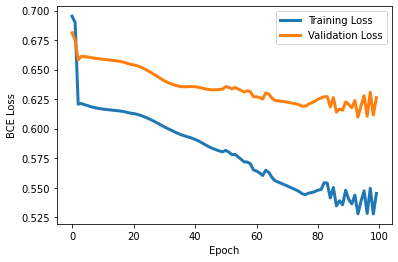

In [53]:
import matplotlib.pyplot as plt
plt.plot(loss_list, linewidth=3)
plt.plot(test_loss_list, linewidth=3)
plt.legend(("Training Loss", "Validation Loss"))
plt.xlabel("Epoch")
plt.ylabel("BCE Loss")

In [54]:

x_test_data = torch.tensor(X_test.values, dtype=torch.float32)
y_pred = model(x_test_data)
y_pred = y_pred.argmax(1) # one hot array to int array
accuracy_score(y_test, y_pred.detach().numpy()) # accuracy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  app.launch_new_instance()


0.6759776536312849